In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
#Reaading the data
BN = pd.read_csv('NSEBANK.csv')

In [3]:
#Having a view of dataset
BN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-06,32915.648438,33007.648438,32338.400391,32501.349609,32501.349609,0
1,2021-04-07,32529.699219,33191.699219,32141.550781,32991.199219,32991.199219,0
2,2021-04-08,33154.199219,33306.800781,32704.750000,32782.851563,32782.851563,0
3,2021-04-09,32636.900391,32972.148438,32329.949219,32448.050781,32448.050781,0
4,2021-04-12,31637.900391,31698.050781,30520.300781,30792.000000,30792.000000,0


In [4]:
#Finding out the null values
BN.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
#information about the data
BN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [6]:
#Shape of the data
BN.shape

(250, 7)

In [7]:
#Overall Stattistics of the data
BN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000
mean,36148.725336,36440.877836,35810.067805,36143.048938,36143.048938,135142.40000
std,2068.335867,2043.629670,2060.386016,2037.747117,2037.747117,122306.01936
min,30763.500000,31304.300781,30405.650391,30792.000000,30792.000000,0.00000
25%,34983.710938,35221.900390,34654.299805,34963.826172,34963.826172,0.00000
50%,35976.775391,36330.775390,35668.025390,36022.000000,36022.000000,143800.00000
75%,37655.137695,37923.598633,37318.788086,37694.273438,37694.273438,200800.00000
max,41234.550781,41829.601563,40829.148438,41238.300781,41238.300781,786800.00000


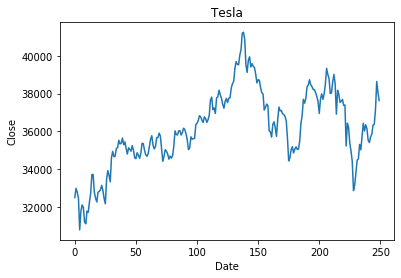

In [8]:
# plotting the data on the graph 
close = BN['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [9]:
#We only need two columns from this dataset (Date and Close), so let’s create a new DataFrame with only these two columns:
BN["Date"] = pd.to_datetime(BN["Date"], infer_datetime_format=True)
data = BN[["Date", "Close"]]

In [10]:
#Having a view on the new dataframe
data.head()

,Date,Close
0,2021-04-06,32501.349609
1,2021-04-07,32991.199219
2,2021-04-08,32782.851563
3,2021-04-09,32448.050781
4,2021-04-12,30792.000000


In [11]:
#Renaming the columns
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [12]:
#So we have prepared the dataset for the Facebook prophet model, now let’s predict the stock prices of Tesla:
model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
610,2023-04-02,42135.442426,41452.820394,42873.968654
611,2023-04-03,42248.495421,41570.988340,43016.417520
612,2023-04-04,42350.145212,41656.172944,43057.332845
613,2023-04-05,42494.987254,41770.962448,43179.159349
614,2023-04-06,42455.298054,41709.972386,43201.317319


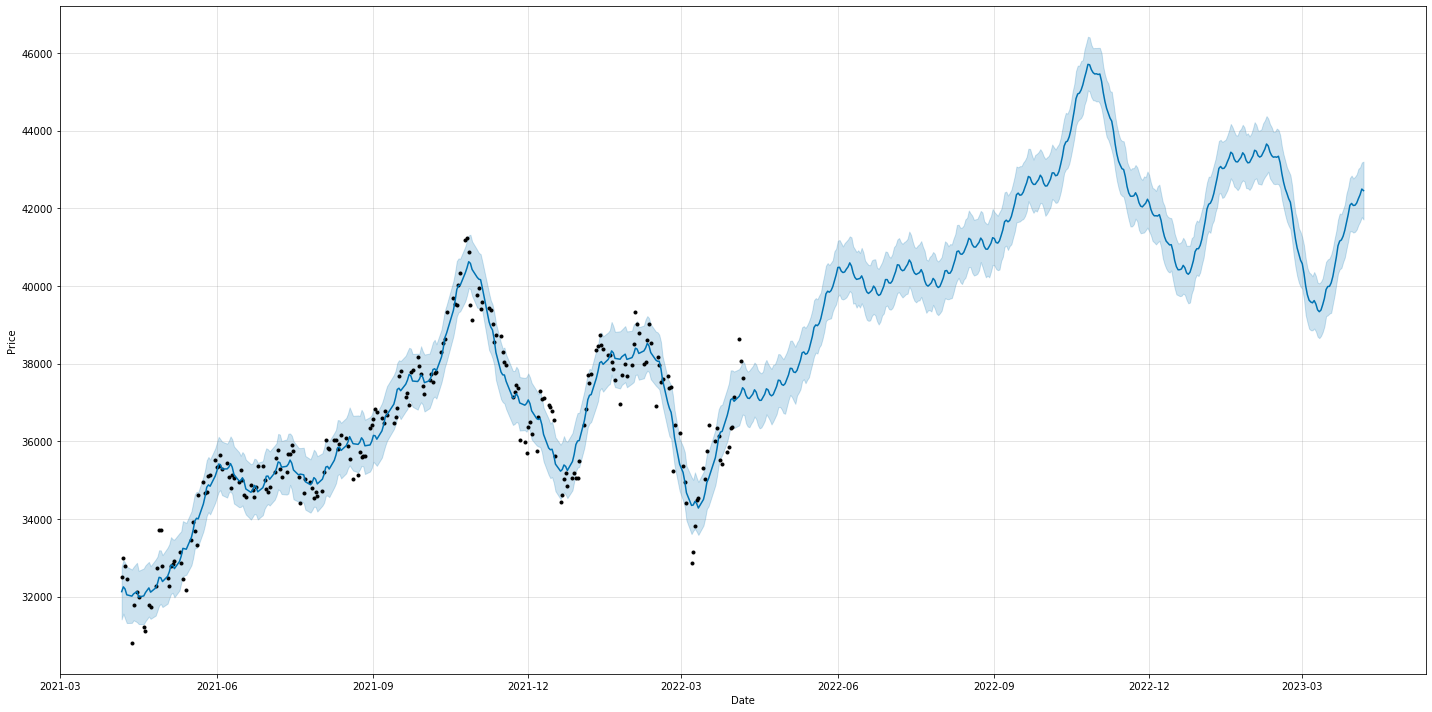

In [16]:
#Plotting the prdicted values
graph = model.plot(forcast, xlabel="Date", ylabel="Price",figsize = (20,10))